# Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. **satisfaction_level** - Уровень удовлетворенности работой
1. **Last_evaluation** - Время с момента последней оценки в годах
1. **number_projects** - Количество проектов, выполненных за время работы
1. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц
1. **time_spend_company** - Стаж работы в компании в годах
1. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником
1. **left** - уволился ли сотрудник
1. **promotion_last_5years** - повышался ли сотрудник за последние пять лет
1. **department** - отдел в котором работает сотрудник
1. **salary** - относительный уровень зарплаты

Требуется выполнить следующее задание:

|#|Задание|Баллы|
|---:|:---|---:|
|1|Загрузить файл HR.csv в pandas dataframe|5|
|2|Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)|10|
|3|Рассчитать и визуализировать корреляционную матрицу для количественных переменных. Определить две самые скоррелированные и две наименее скоррелированные переменные|10|
|4|Рассчитать, сколько сотрудников работает в каждом департаменте|5|
|5|Показать распределение сотрудников по зарплатам|5|
|6|Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности|5|
|7|Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом|10|
|8|Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):<ul><li>Доля сотрудников с повышением за последние 5 лет</li><li>Средняя степень удовлетворенности</li><li>Среднее количество проектов</li></ul>|10|
|9|Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке|20|
|10|Загрузить jupyter notebook с решение на github и прислать ссылку|5|

Итого - максимум 85 баллов

Для зачета необходимо набрать минимум 55

# Решение

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns

## 1. Загрузить файл HR.csv в pandas dataframe

In [2]:
# Прочитать CSV по этой ссылке - отдельное приключение :)
url = 'https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Ни одного пустого значения. Данные выглядят как хорошо подготовленные.
# Какие из них - числовые?
numeric_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']
df_num = df[numeric_columns]
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction_level    14999 non-null  float64
 1   last_evaluation       14999 non-null  float64
 2   number_project        14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 586.0 KB


## 2. Рассчитать основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)

In [5]:
# Все статистики, кроме моды: (медиана - в колонке 50%)
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0


In [6]:
# Моды (и категориальные параметры тоже посмотрим)
df.mode().T

,0,1
satisfaction_level,0.1,NaN
last_evaluation,0.55,NaN
number_project,4.0,NaN
average_montly_hours,135,156
time_spend_company,3.0,NaN
Work_accident,0.0,NaN
left,0.0,NaN
promotion_last_5years,0.0,NaN
department,sales,NaN
salary,low,NaN


## 3. Рассчитать и визуализировать корреляционную матрицу для количественных переменных
Определить две самые скоррелированные и две наименее скоррелированные переменные

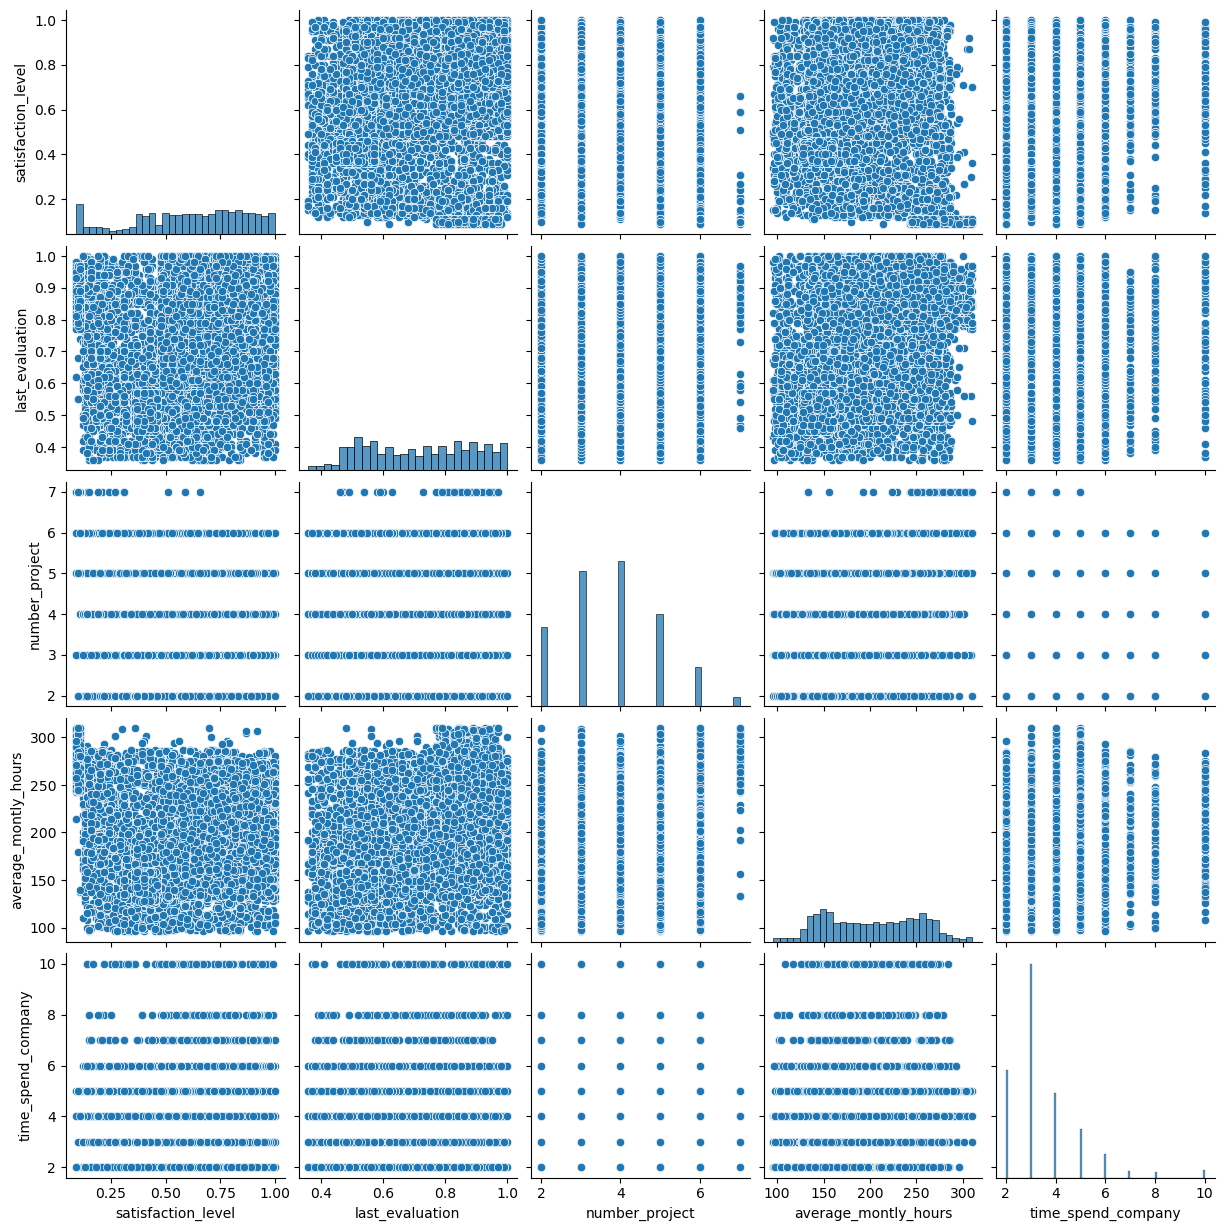

In [7]:
# Посмотрим на общую картину
sns.pairplot(df_num)

In [8]:
# Сложно понять, есть ли где-то заметная корреляция. 
# И распределения явно ненормальные. Будем считать по Спирмену
corr = df_num.corr(method='spearman')
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154
number_project,0.005786,0.350399,1.000000,0.397855,0.251971
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000


<Axes: >

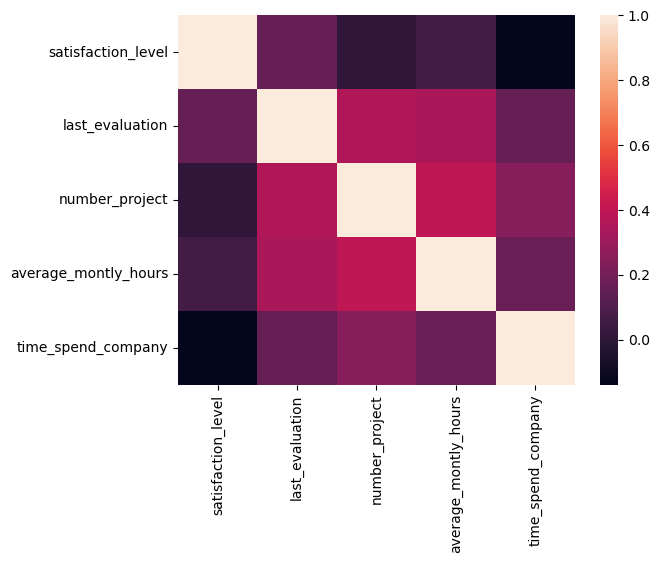

In [9]:
# Визуализируем:
sns.heatmap(corr)

In [31]:
# Ну так и есть, слабая корреляция или вообще нет.
# Наибольшая - между average_montly_hours и number_project
# Наименьшая - между satisfaction_level и time_spend_company
# Но в целом скучная картина.
# Что, если посмотреть отдельно по работающим и ушедшим?

In [11]:
df_working = df[df['left'] == 0]
corr_working = df_working[numeric_columns].corr(method='spearman')
corr_working

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.084378,-0.032988,0.056983,-0.148579
last_evaluation,0.084378,1.000000,0.042528,0.083342,-0.012908
number_project,-0.032988,0.042528,1.000000,0.071694,0.098535
average_montly_hours,0.056983,0.083342,0.071694,1.000000,-0.014932
time_spend_company,-0.148579,-0.012908,0.098535,-0.014932,1.000000


<Axes: >

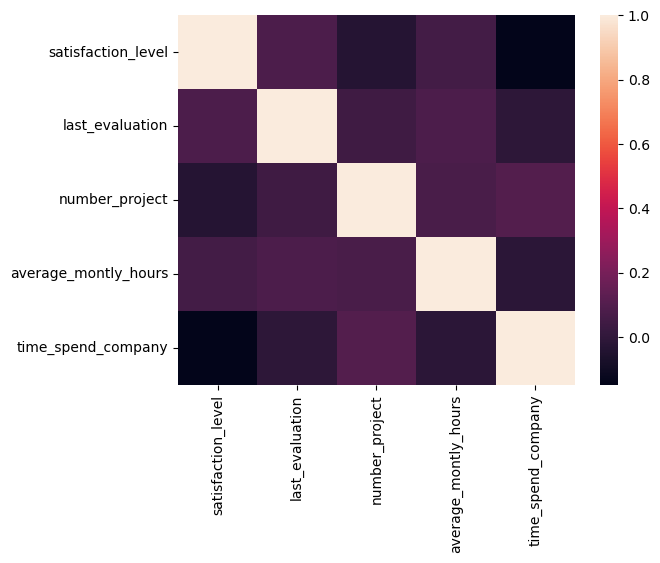

In [12]:
sns.heatmap(corr_working)

In [13]:
# У работающих сотрудников корреляция между числовыми параметрами вообще незаметная.
# А у покинувших компанию?

In [14]:
df_left = df[df['left'] == 1]
corr_left = df_left[numeric_columns].corr(method='spearman')
corr_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.146303,-0.305108,-0.200816,0.288740
last_evaluation,0.146303,1.000000,0.715219,0.685706,0.783041
number_project,-0.305108,0.715219,1.000000,0.831012,0.673265
average_montly_hours,-0.200816,0.685706,0.831012,1.000000,0.653588
time_spend_company,0.288740,0.783041,0.673265,0.653588,1.000000


<Axes: >

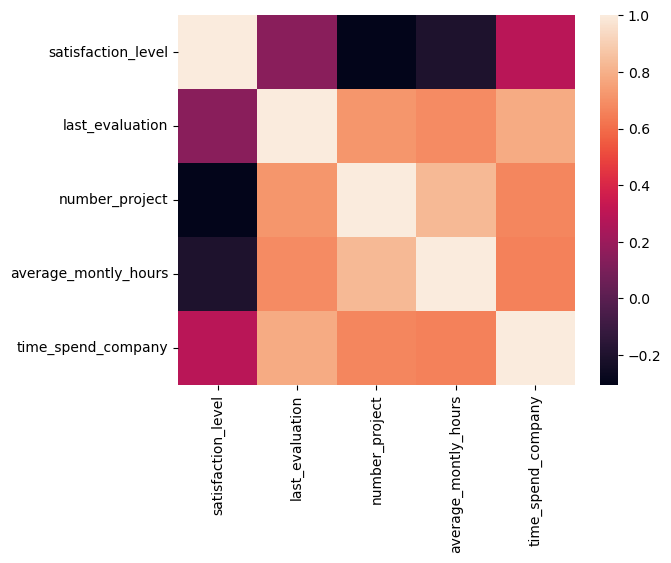

In [15]:
sns.heatmap(corr_left)

In [16]:
# А здесь-то совсем другая история.
# Сильная положительная корреляция между number_project и average_montly_hours (0.83)
# Сильная положительная корреляция между last_evaluation и time_spend_company (0.78)
# Отсутствие корреляции между satisfaction_level и average_monthly_hours & number_project.
# Не покинули ли эту компанию самые лучшие люди?
# Возможно, HRу стоит провести более глубокое исследование причин увольнений.

## 4. Рассчитать, сколько сотрудников работает в каждом департаменте

In [115]:
# Сколько _работает_, то есть ушедших не считаем.
num_workers = df_working.groupby('department')['department'].count().sort_values(ascending=False)
num_workers

department
sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

<Axes: xlabel='department', ylabel='department'>

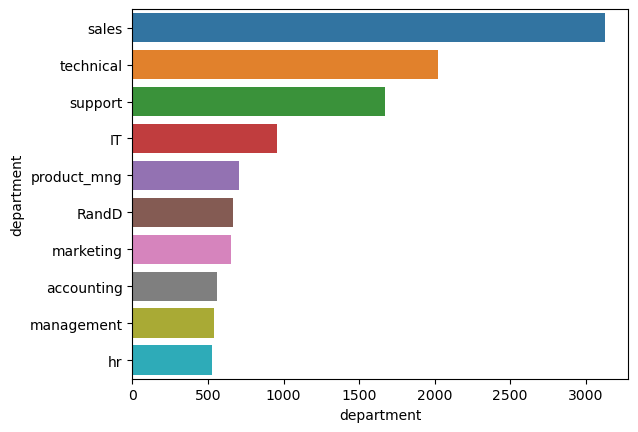

In [114]:
sns.barplot(y=num_workers.index, x=num_workers, orient='h')

## 5. Показать распределение сотрудников по зарплатам

<Axes: xlabel='salary', ylabel='Count'>

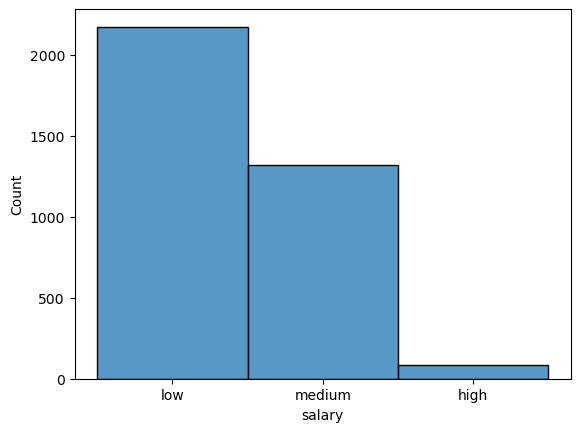

In [18]:
# Тут в условии не сказано, только работающих или вообще,
# но уже интересно продолжить раздельное исследование.
sns.histplot(df_left['salary'])

<Axes: xlabel='salary', ylabel='Count'>

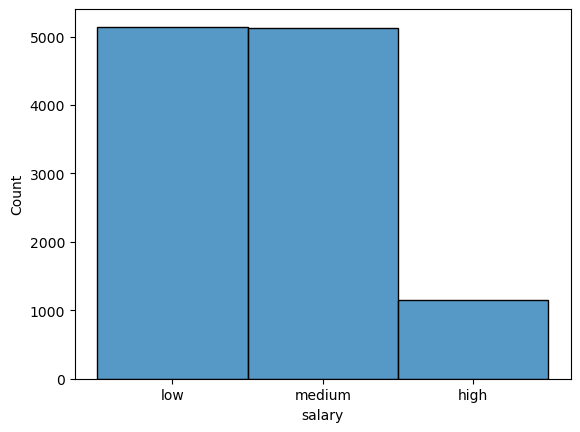

In [19]:
sns.histplot(df_working['salary'])

In [20]:
# Среди покинувших компанию доля низкооплачиваемых заметно выше, чем среди работающих.
# Учитывая найденные выше корреляции, правильная ли это была зарплата? HRу на заметку.

## 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [21]:
pt_working = df_working.reset_index().pivot_table(index = 'department', columns = 'salary', values = 'index', aggfunc = 'count')
pt_left = df_left.reset_index().pivot_table(index = 'department', columns = 'salary', values = 'index', aggfunc = 'count')

In [22]:
pt_working

salary,high,low,medium
department,,,
IT,79,437,438
RandD,47,309,310
accounting,69,259,235
hr,39,243,242
management,224,121,194
marketing,71,276,308
product_mng,62,346,296
sales,255,1402,1469
support,133,757,784


In [23]:
pt_left

salary,high,low,medium
department,,,
IT,4,172,97
RandD,4,55,62
accounting,5,99,100
hr,6,92,117
management,1,59,31
marketing,9,126,68
product_mng,6,105,87
sales,14,697,303
support,8,389,158


<Axes: xlabel='department'>

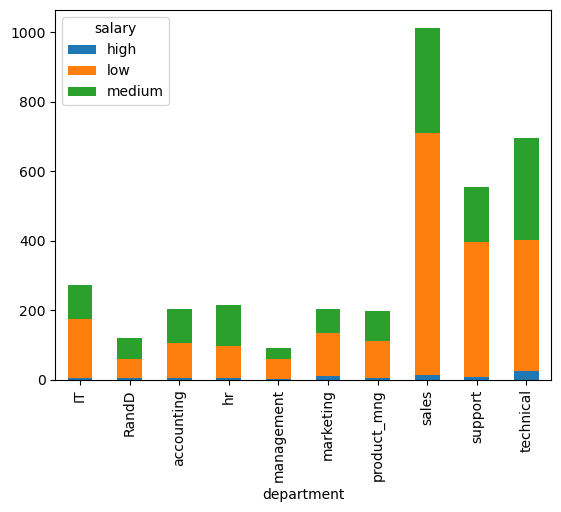

In [24]:
pt_left.plot(kind='bar', stacked=True)

<Axes: xlabel='department'>

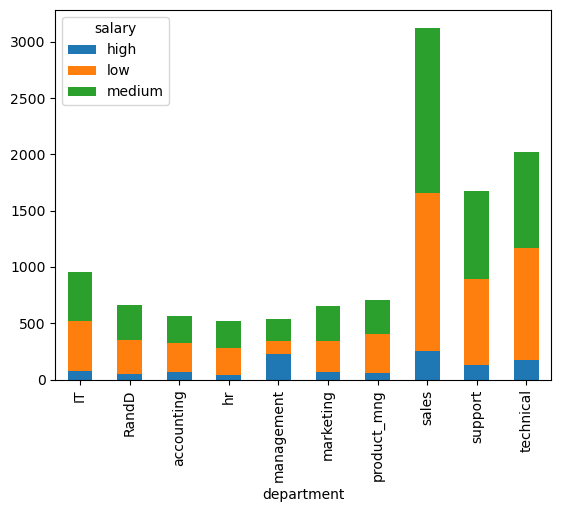

In [25]:
pt_working.plot(kind='bar', stacked=True)

In [26]:
# Среди работающих по сравнению с ушедшими заметно больше доля 
# высоких и средних зарплат, особенно у менеджеров и сейлов.
# Ну что же, пожелаем компании коммерческих успехов :)

## 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [27]:
# Пусть H0 - нет статистически значимых различий между временем, 
# которое проводят на работе сотрудники с low и high salary.
# Получим выборки:
s_high = df[df['salary'] == 'high']['average_montly_hours']
s_low = df[df['salary'] == 'low']['average_montly_hours']

In [28]:
print(f'Сотрудники с низкой зарплатой проводят на работе в среднем {s_low.mean():.2f} часов в месяц, ')
print(f'а сотрудники с высокой зарплатой — {s_high.mean():.2f} часов в месяц.')

Сотрудники с низкой зарплатой проводят на работе в среднем 201.00 часов в месяц, 
а сотрудники с высокой зарплатой — 199.87 часов в месяц.


Text(0.5, 1.0, 'Сравнение проводимого на работе времени')

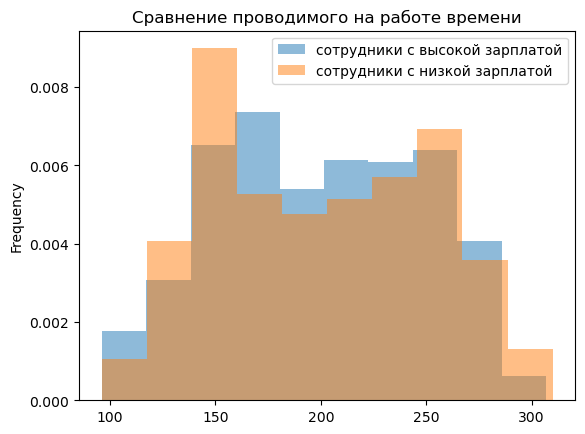

In [29]:
# Очень близкие значения средних. А на графике?
import matplotlib.pyplot as plt
s_high.plot(kind='hist', alpha = 0.5, bins=10, density = True, label='сотрудники с высокой зарплатой')
s_low.plot(kind='hist', alpha = 0.5, bins=10, density = True, label='сотрудники с низкой зарплатой')
plt.legend(loc='upper right')
plt.title('Сравнение проводимого на работе времени')

In [34]:
# Графики тоже намекают на то, что статистического различия не будет.
# А что говорят числа? Распределения не нормальны, поэтому применим тест Манна-Уитни.
import scipy.stats as st
stat, p = st.mannwhitneyu(s_low, s_high)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")

Статистика = 4542795.50000, p = 0.82413


In [35]:
# p > 0.05, т.е. у нас нет статистических оснований отклонять H0 при стандатном уровне значимости 5%.
# Иными словами, нет оснований подозревать, что высокооплачиваемые сотрудники проводят на работе больше времени.

## 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [36]:
rate_promoted_left = df_left['promotion_last_5years'].value_counts()[1]/len(df_left)
rate_promoted_working = df_working['promotion_last_5years'].value_counts()[1]/len(df_working)

In [37]:
mean_satisfaction_left = df_left['satisfaction_level'].mean()
mean_satisfaction_working = df_working['satisfaction_level'].mean()

In [38]:
mean_projects_left = round(df_left['number_project'].mean())
mean_projects_working = round(df_working['number_project'].mean())

In [39]:
table = [[rate_promoted_left, rate_promoted_working],
         [mean_satisfaction_left, mean_satisfaction_working],
         [mean_projects_left, mean_projects_working]]
rows = ['доля с повышением за последние 5 лет', 'средняя степень удовлетворенности', 'среднее количество проектов']
columns = ['ушедшие', 'работающие']
df_result = pd.DataFrame(table, columns = columns, index=rows)
df_result

,ушедшие,работающие
доля с повышением за последние 5 лет,0.005321,0.026251
средняя степень удовлетворенности,0.440098,0.666810
среднее количество проектов,4.000000,4.000000


## 9. LDA анализ
1. Разделить данные на тестовую и обучающую выборки.
1. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
1. Оценить качество модели на тестовой выборке

In [40]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [92]:
# Независимые переменные
X = df.drop(['left', 'department', 'salary'], axis=1)
# Целевая переменная
y = df['left'].values

In [94]:
# Создаем тестовую и обучающую выборки:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [95]:
# Строим модель LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [96]:
y_predict = lda.predict(X_test)

In [102]:
# Проверяем качество модели
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.7536